# 03.11 - Working with Time Series

Pandas is able to work with several formats of date and time. We can categorize them as:

1. Time stamps 
2. Time intervals
3. Time deltas

### Dates and Times in Python

Let's have a look at what is already available in Python and their relationship with Pandas:

#### Native Python dates and times: <code>datetime</code> and <code>dateutil</code>

Using built-in <code>datetime</code>, we can manually build a date:

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Using the <code>dateutil</code> module, you can parse dates from a variety of string formats:

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Or printing the day of the week:

In [3]:
date.strftime('%A')

'Saturday'

### Typed arrays of times: NumPy's <code>datetime64</code>

The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

But we use vectorized operations on it:

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

The trade-off here is _time resolution_ vs. _maximum time span_. Whatever is our fundamental unit of choice (day, minute, second etc.) the range of encodable times is 2^64 times this fundamental unit.

In [6]:
#working in nanoseconds
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

### Dates and times in pandas: best of both worlds

Pandas also provides a useful <code>Timestamp</code> object.  
From a group of these Timestamp objects, Pandas can construct a <code>DatetimeIndex</code> that can be used to index data in a Series or DataFrame.

In [7]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [8]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [9]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to **index data by timestamps**. For example, we can construct a Series object that has time indexed data:

In [10]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now we can use any of the indexing methods used for <code>Series</code>:

In [11]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Also, there are special date-only indexing operations:

In [12]:
# getting data for a specific year
data['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

### Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

* For time stamps, Pandas provides the <code>Timestamp</code> type. The associated Index structure is <code>DatetimeIndex</code>;
* For time Periods, Pandas provides the <code>Period type</code>. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is <code>PeriodIndex</code>.
* For time deltas or durations, Pandas provides the <code>Timedelta</code> type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is <code>TimedeltaIndex</code>.

To use <code>Timestamp</code> and <code>DatetimeIndex</code> it is common to use <code>pd.to_datetime()</code>, since it can parse a wide variety of date formats:

In [13]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any <code>DatetimeIndex</code> can be converted to a PeriodIndex with the <code>to_period()</code> function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [14]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A <code>TimedeltaIndex</code> is created, for example, when a date is subtracted from another:

In [15]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: <code>pd.date_range()</code>

To make creation of date sequences easier, Pandas offers a few functions for this purpose: <code>pd.date_range()</code> for timestamps, <code>pd.period_range()</code> for periods, and <code>pd.timedelta_range()</code> for time deltas.

We can think of them as an extension of <code>range</code>(Python) or <code>arange</code>(NumPy):

In [16]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of Period or Timedelta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. Here are some monthly periods:

In [19]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

### Frequencies and Offsets

<pre>

Code  Description 	
D 	Calendar day 	
W 	Weekly 		
M 	Month end 	
Q 	Quarter end 	
A 	Year end 	
H 	Hours 	
T 	Minutes 		
S 	Seconds 		
L 	Milliseonds 		
U 	Microseconds 		
N 	nanoseconds 

B 	 Business day
BM 	Business month end
BQ 	Business quarter end
BA 	Business year end
BH 	Business hours

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an **S** suffix to any of these, they instead will be marked at the beginning:

<pre>
MS 	Month start 
QS 	Quarter start 
AS 	Year start 

BMS 	Business month start
BQS 	Business quarter start
BAS 	Business year start
</pre>

Additionally, we can change the **month used to mark any quarterly or annual code** by adding a three-letter month code as a suffix:

* Q-JAN, etc..
* A-JAN, etc..

Same for weeks:

* W-SUN, etc..

In [20]:
import pandas as pd

In [26]:
data = pd.read_csv('../data/Fremont_Bridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [27]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [28]:
# let's have a look at the data
data.dropna().describe()

,West,East,Total
count,54735.000000,54735.000000,54735.000000
mean,52.619530,58.300850,110.920380
std,68.034365,84.733147,140.018123
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,70.000000,144.000000
max,698.000000,717.000000,957.000000


In [29]:
%matplotlib inline
import seaborn; seaborn.set()

NameError: name 'plt' is not defined

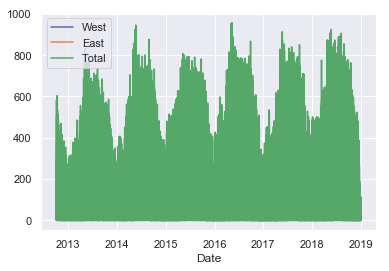

In [35]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

NameError: name 'plt' is not defined

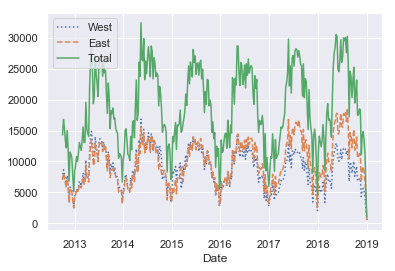

In [36]:
# hourly is too dense, let's do weekly
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

NameError: name 'plt' is not defined

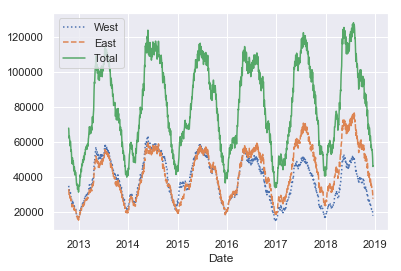

In [37]:
# rolling mean
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

#### Digging into the data

Let's look at more specific instances, for example a day. We might want to look at the average traffic as a function of the time of day:

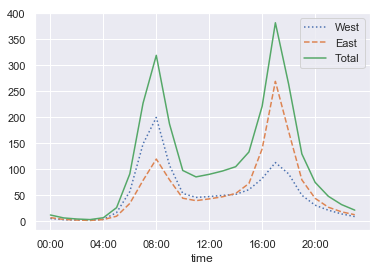

In [38]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

This strongly bimodal distribution is likely evidence of a strong component of commuter traffic crossing the bridge.  

This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

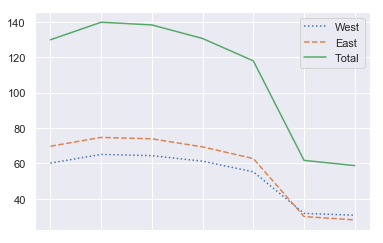

In [39]:
# changes by day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

Now let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. 

In [40]:
# flagging weekend days
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

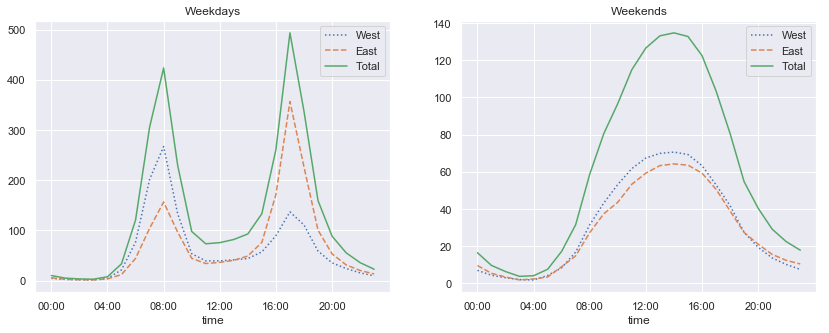

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);